#### We will import annual sales data and seek answers to the following questions

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [168]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#merging 12 month into a single file
#files list
files = ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv',
            'Sales_May_2019.csv', 'Sales_june_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv',
            'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']

# backup llist
list_df = []

# Carregar cada arquivo CSV como um dataframe e adicionar à lista
for files in files:
    df = pd.read_csv(files)
    list_df.append(df)

# Combinar todos os dataframes em um único dataframe
database = pd.concat(list_df)

# Salvar o dataframe combinado em um novo arquivo CSV
database.to_csv('Sales_2019.csv', index=False)

In [170]:
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [171]:
database

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [172]:
database.shape

(186850, 6)

In [173]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [174]:
database.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [175]:
#print NaN
has_nan = database[database.isna().any(axis=1)]
print(has_nan)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
22945      NaN     NaN              NaN        NaN        NaN              NaN
22962      NaN     NaN              NaN        NaN        NaN              NaN
23309      NaN     NaN              NaN        NaN        NaN              NaN
23996      NaN     NaN              NaN        NaN        NaN              NaN
24730      NaN     NaN              NaN        NaN        NaN              NaN

[545 rows x 6 columns]


In [176]:
database = database.dropna(how='all')
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [177]:
#checking NaN
database.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [178]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [179]:
#Clening 'Or'
database = database[database['Order Date'].str[0:2] != 'Or']
database

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### What was the best month for sales?

In [180]:
#creating new column 'Month'
database['Month'] = database['Order Date'].str[0:2]
database['Month'] = database['Month'].astype('int32')
database

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [181]:
#Creating Column Sales
database['Quantity Ordered'] = pd.to_numeric(database['Quantity Ordered'], errors='coerce')
database['Price Each'] = pd.to_numeric(database['Price Each'], errors='coerce')

database['Sales'] = database['Quantity Ordered'] * database['Price Each']

# Head
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [182]:
# group by month
monthly_sales = database.groupby('Month').sum()

In [183]:
##### The best month for sales was december $4.613.443,34 #####

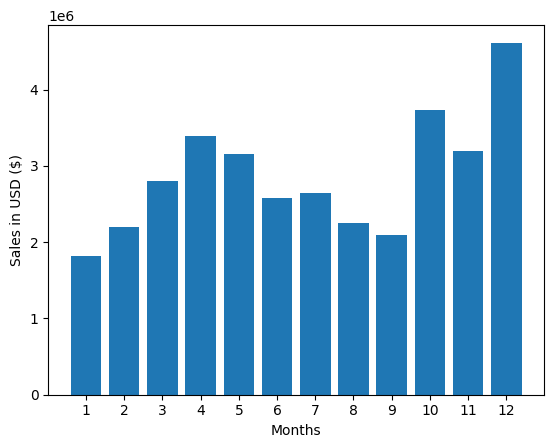

In [184]:
months = range (1,13)

plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months');
plt.show()

#### What the city had the highest number of sales?

In [206]:
# extract the city from the purchase address
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Creat column 'City'
database['City'] = database['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Verificar as primeiras linhas do DataFrame para confirmar
database

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [208]:
results = database.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1412531412611412811412891412961413111413471413...,AA Batteries (4-pack)USB-C Charging CableLight...,16602,2779908.20,01/17/19 00:0901/09/19 18:1401/05/19 16:5101/2...,"385 11th St, Atlanta, GA 30301840 Lincoln St, ...",104794,2795498.58
Austin (TX),1412381412481412751412751412771412951413051413...,Wired HeadphonesFlatscreen TVUSB-C Charging Ca...,11153,1809873.61,01/25/19 11:5901/03/19 21:5401/07/19 16:0601/0...,"387 10th St, Austin, TX 73301363 Spruce St, Au...",69829,1819581.75
Boston (MA),1412341412511412631412651412711412731412791412...,iPhoneApple Airpods HeadphonesBose SoundSport ...,22528,3637409.77,01/22/19 21:2501/24/19 08:1301/11/19 23:3301/0...,"944 Walnut St, Boston, MA 02215414 Walnut St, ...",141112,3661642.01
Dallas (TX),1412661412861412981412991413381413391413551413...,27in 4K Gaming Monitor27in 4K Gaming MonitorLi...,16730,2752627.82,01/02/19 22:2101/02/19 20:3301/21/19 13:2401/3...,"834 4th St, Dallas, TX 75001505 Hickory St, Da...",104620,2767975.40
Los Angeles (CA),1412371412401412421412461412501412521412551412...,27in FHD Monitor27in 4K Gaming MonitorBose Sou...,33289,5421435.23,01/05/19 20:3301/26/19 12:1601/01/19 10:3001/0...,"738 10th St, Los Angeles, CA 90001979 Park St,...",208325,5452570.80
New York City (NY),1412641412681412721412781412821413011413141413...,Apple Airpods HeadphonesAA Batteries (4-pack)A...,27932,4635370.83,01/03/19 09:4601/14/19 10:1301/12/19 13:0901/2...,"937 Highland St, New York City, NY 10001611 El...",175741,4664317.43
Portland (ME),1413291413721413951414071414091416531417681418...,USB-C Charging CableAAA Batteries (4-pack)AAA ...,2750,447189.25,01/01/19 16:0101/26/19 10:0701/29/19 16:2001/0...,"122 5th St, Portland, ME 04101134 Hickory St, ...",17144,449758.27
Portland (OR),1412351412491412561413021413081413301413361413...,Lightning Charging Cable27in FHD MonitorGoogle...,11303,1860558.22,01/28/19 14:1501/05/19 17:2001/29/19 10:4001/1...,"185 Maple St, Portland, OR 97035440 Cedar St, ...",70621,1870732.34
San Francisco (CA),1412361412391412411412431412441412451412471412...,Wired HeadphonesAAA Batteries (4-pack)USB-C Ch...,50239,8211461.74,01/17/19 13:3301/29/19 20:2201/05/19 12:0401/2...,"538 Adams St, San Francisco, CA 94016775 Willo...",315520,8262203.91


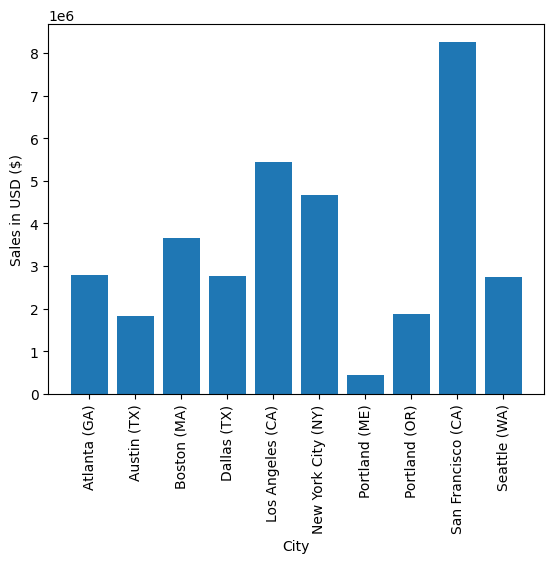

In [213]:
cities = [city for city, df in database.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation=90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City');
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying  produtc?

In [214]:
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [218]:
#checking dtype column Order Date
database['Order Date'].info()

<class 'pandas.core.series.Series'>
Index: 185950 entries, 0 to 25116
Series name: Order Date
Non-Null Count   Dtype         
--------------   -----         
185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


In [219]:
#changing type to datatime
database['Order Date'] = pd.to_datetime(database['Order Date'], format='%m/%d/%y %H:%M')

In [220]:
#checking the change
database['Order Date'].info()

<class 'pandas.core.series.Series'>
Index: 185950 entries, 0 to 25116
Series name: Order Date
Non-Null Count   Dtype         
--------------   -----         
185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


In [222]:
#creat new column 'Hour'
database['Hour'] = database['Order Date'].dt.hour
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11


In [228]:
# count the frequency of each hour
hour_counts = database['Hour'].value_counts()
hour_counts

Hour
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: count, dtype: int64

In [227]:
# hours that sell the most are 11, 12, 13, 18, 19 e 20

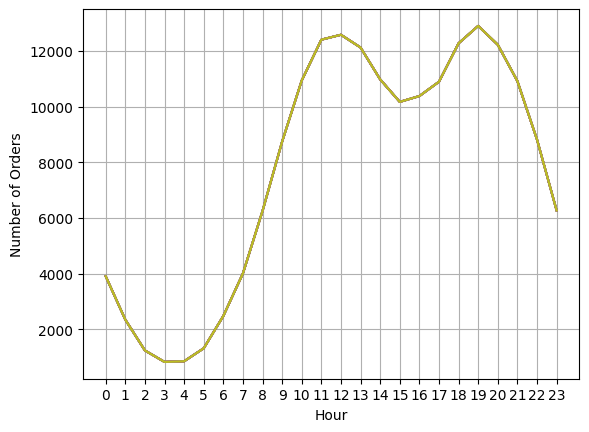

In [246]:
hours = [hour for hour, df in database.groupby('Hour')]

plt.plot(hours, database.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [244]:
#my recommendation to maximize advertisementsis is around 11 am (11) and 7pm (19)

#### What produtcts are most often sold together ?

In [259]:
grouped = database.groupby('Order ID')['Product'].count()

# Depois, filtramos para obter apenas aqueles 'Order ID' que têm mais de um produto
multiple_products = grouped[grouped > 3]

# Agora, usamos o índice deste DataFrame filtrado (que são os 'Order ID') para obter as linhas originais
# que têm esses 'Order ID'
orders_with_multiple_products = database[database['Order ID'].isin(multiple_products.index)]

print(orders_with_multiple_products)

      Order ID                   Product  Quantity Ordered  Price Each  \
10836   160873                    iPhone                 1      700.00   
10837   160873  Lightning Charging Cable                 1       14.95   
10838   160873  Apple Airpods Headphones                 1      150.00   
10839   160873          Wired Headphones                 1       11.99   
10840   160873              Google Phone                 1      600.00   
...        ...                       ...               ...         ...   
17518   312407  Apple Airpods Headphones                 1      150.00   
17577   312462                    iPhone                 1      700.00   
17578   312462  Lightning Charging Cable                 1       14.95   
17579   312462  Apple Airpods Headphones                 2      150.00   
17580   312462          Wired Headphones                 1       11.99   

               Order Date                        Purchase Address  Month  \
10836 2019-02-10 10:24:00   702 Riv

In [257]:
database['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [269]:
#import libs
from itertools import combinations
from collections import Counter

# group 'Order ID' add products to list
grouped = database.groupby('Order ID')['Product'].apply(list)

# filter the groups that have more than one product   
grouped = grouped[grouped.apply(lambda x: len(x) > 1)]

# create combinations of product pairs in each group
product_pairs = grouped.apply(lambda x: list(combinations(sorted(x), 2)))

# count the frequency of each pair of products
pair_counts = Counter()

for pair_list in product_pairs:
    pair_counts.update(pair_list)

# show pairs more common
most_common_pairs = pair_counts.most_common()

most_common_pairs

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129),
 (('Apple Airpods Headphones', 'Lightning Charging Cable'), 116),
 (('AA Batteries (4-pack)', 'Lightning Charging Cable'), 106),
 (('Bose SoundSport Headphones', 'USB-C Charging Cable'), 102),
 (('Apple Airpods Headphones', 'Wired Headphones'), 100),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 100),
 (('AAA Batteries (4-pack)', 'USB-C Charging Cable'), 95),
 (('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 87),
 (('AAA Batteries (4-pack)', 'Wired Headphones'), 86),
 (('AA Bat

In [268]:
#top 5 solds together
top_5_pairs = pair_counts.most_common(5)
top_5_pairs

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373)]

In [ ]:
# The produtcts are most often sold together are Lightning Charging Cable and iPhone

#### What product sold the most ? Why do you think it sold the most?

In [284]:
#group products
products_group = database.groupby('Product')

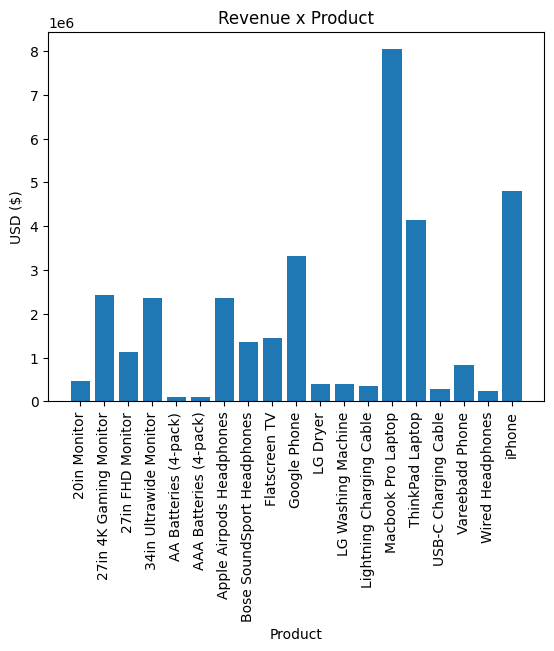

In [285]:
products = [product for product, df in database.groupby('Product')]

plt.bar(products, products_group['Sales'].sum())
plt.xticks(products, rotation=90)
plt.title('Revenue x Product')
plt.ylabel('USD ($)')
plt.xlabel('Product');
plt.show()

In [279]:
#
database.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11


In [289]:
# quantity of products sold
quantity = group_product['Quantity Ordered'].sum()
quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

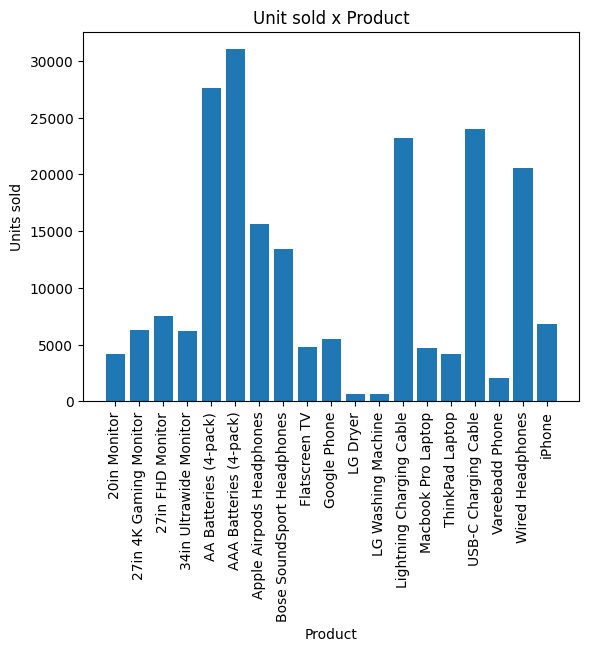

In [292]:
products = [product for product, df in database.groupby('Product')]

plt.bar(products, quantity)
plt.xticks(products, rotation=90)
plt.title('Unit sold x Product')
plt.ylabel('Units sold')
plt.xlabel('Product');
plt.show()

In [ ]:
# The most product sold are Batteries and Charging Cable, probably because they are cheaper and faster-moving products

In [310]:
#checkin the prices
price_products = database.groupby('Product')
price_products = price_products['Price Each'].mean()

price_products

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

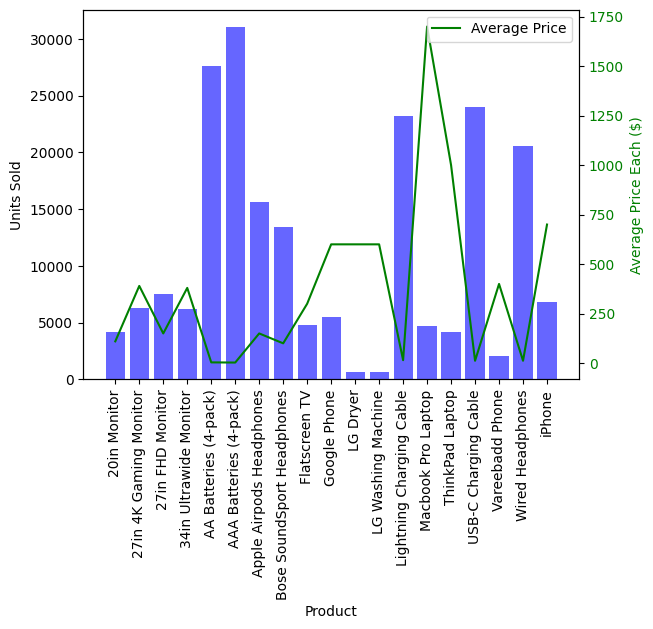

In [316]:
plt.bar(products, quantity, color='b', alpha=0.6, label='Units Sold')

# Configuração dos eixos e títulos
plt.xticks(products, rotation=90)
plt.ylabel('Units Sold')
plt.xlabel('Product')

# Criar um eixo y secundário
ax2 = plt.twinx()

# Dados dos preços médios
price_products = database.groupby('Product')['Price Each'].mean()

# Plotar os preços médios no eixo y secundário
ax2.plot(products, price_products, color='g', label='Average Price')

# Configuração do eixo y secundário
ax2.set_ylabel('Average Price Each ($)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adicionando legendas
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar o gráfico
plt.show()